In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
two_blobs = pd.read_csv('../data/cluster-two-blobs.csv')

In [3]:
two_blobs_outliers = pd.read_csv('../data/cluster-two-blobs-outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

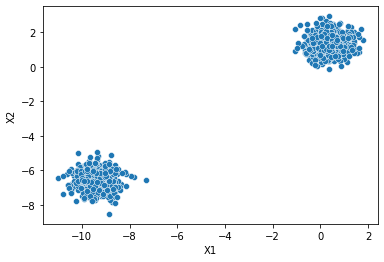

In [4]:
sns.scatterplot(data=two_blobs, x='X1', y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

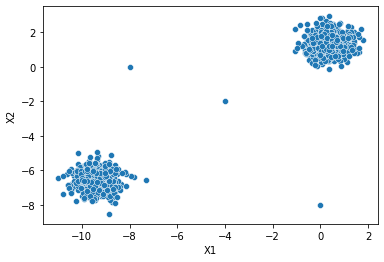

In [5]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

In [16]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    
    plt.figure(figsize=(12, 6), dpi=200)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
dbscan = DBSCAN()

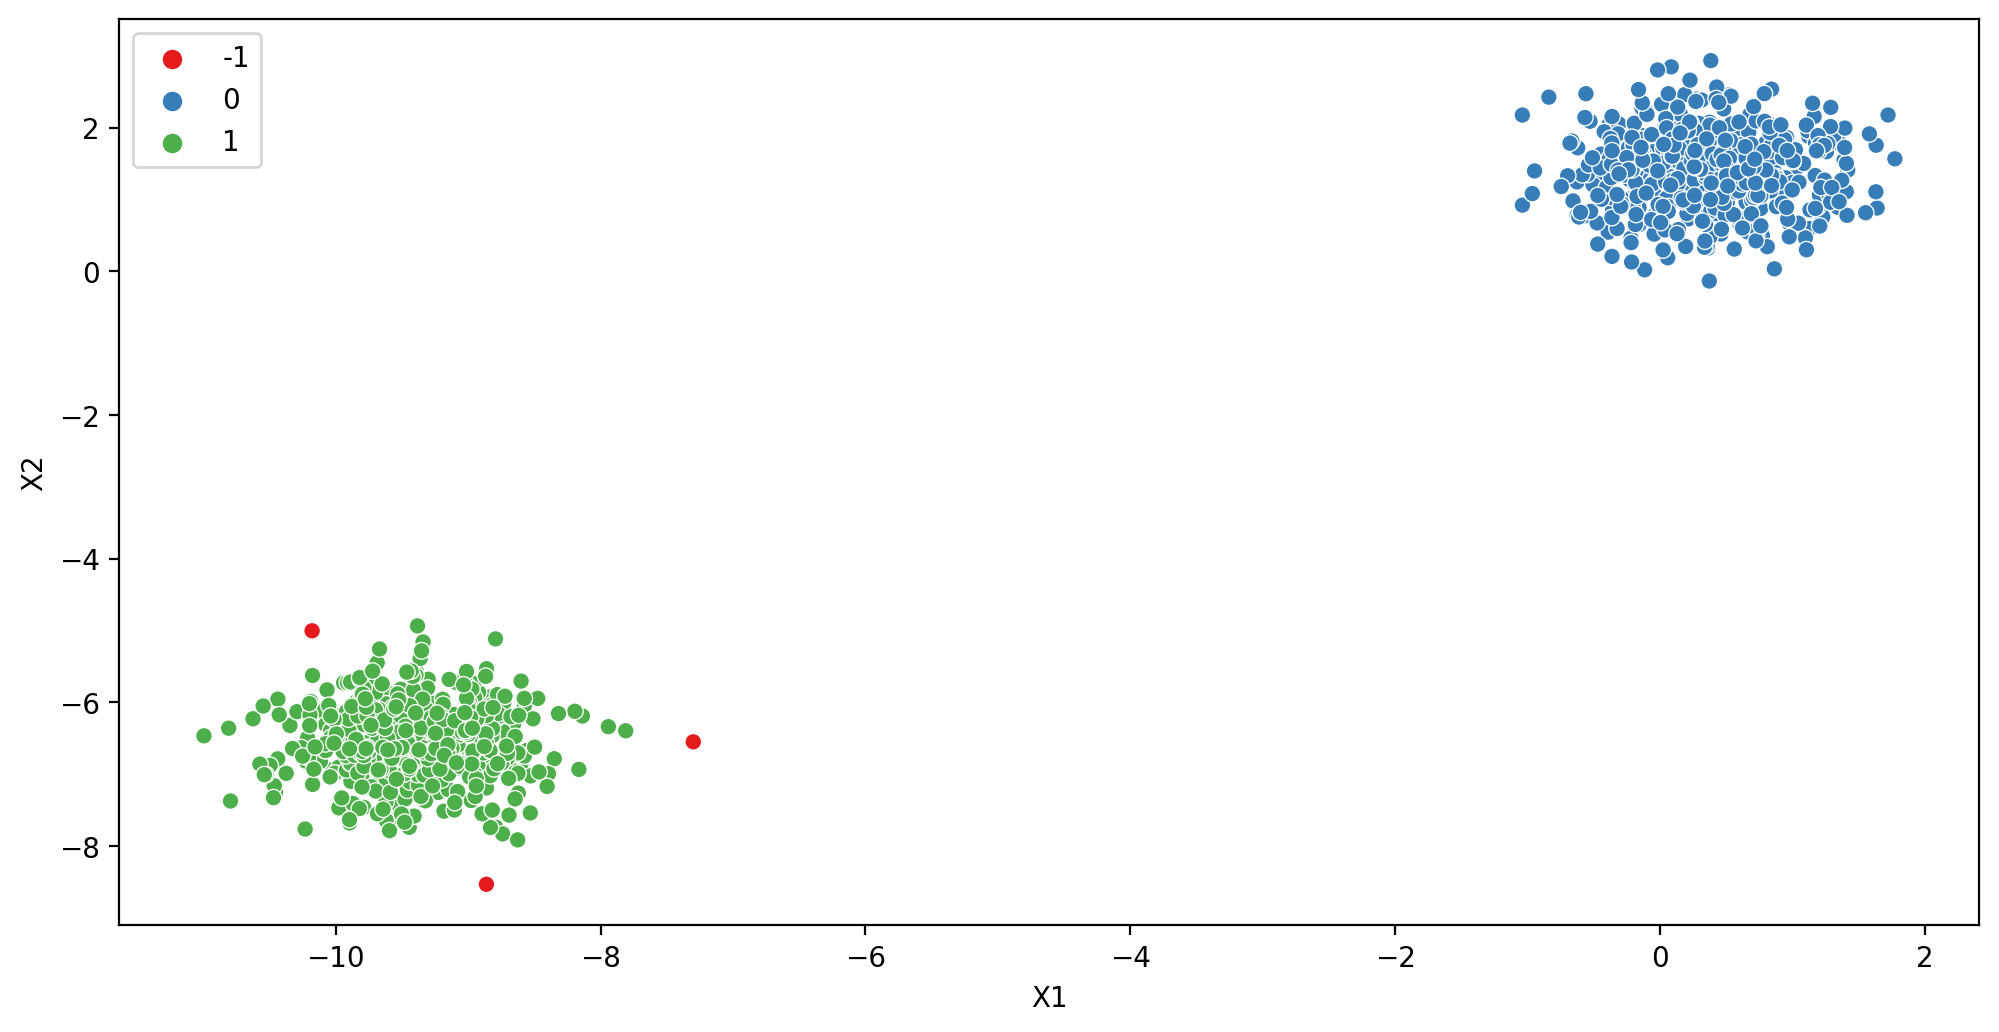

In [19]:
display_categories(dbscan, two_blobs)

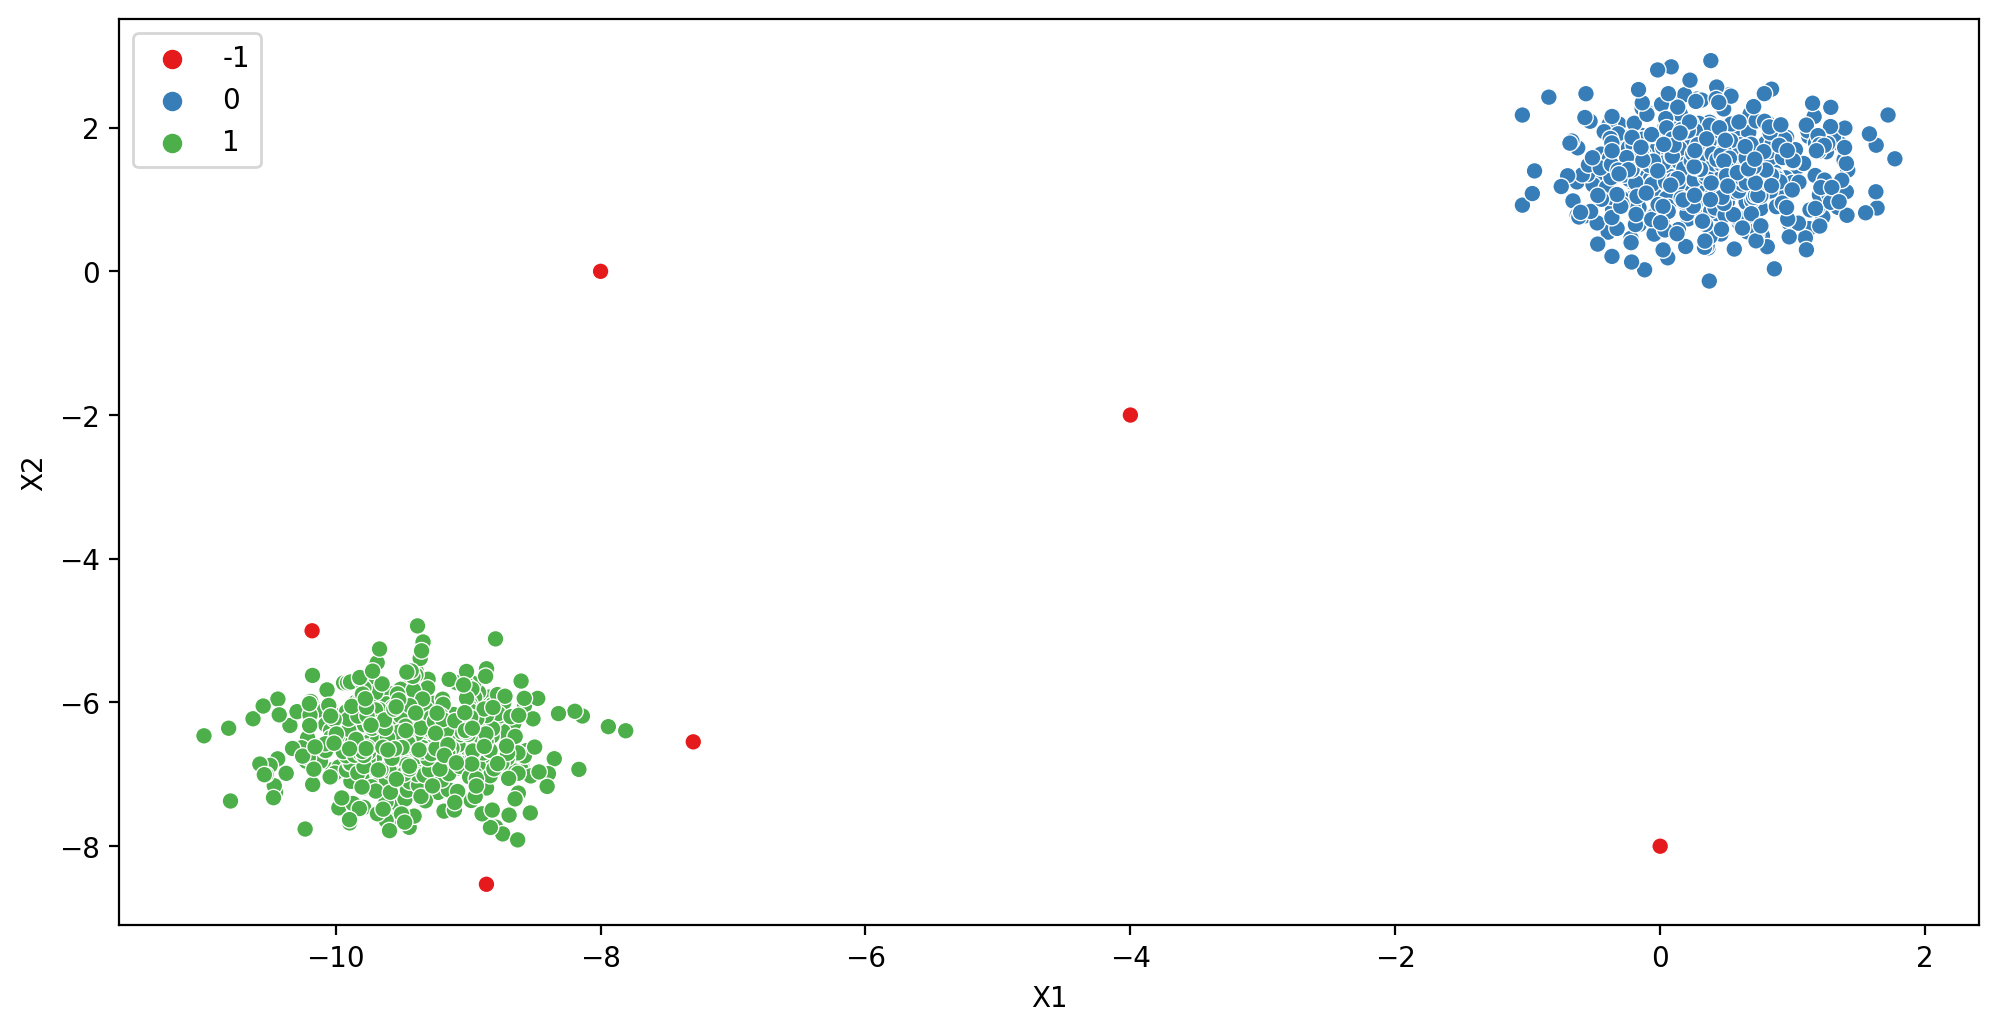

In [20]:
display_categories(dbscan, two_blobs_outliers)

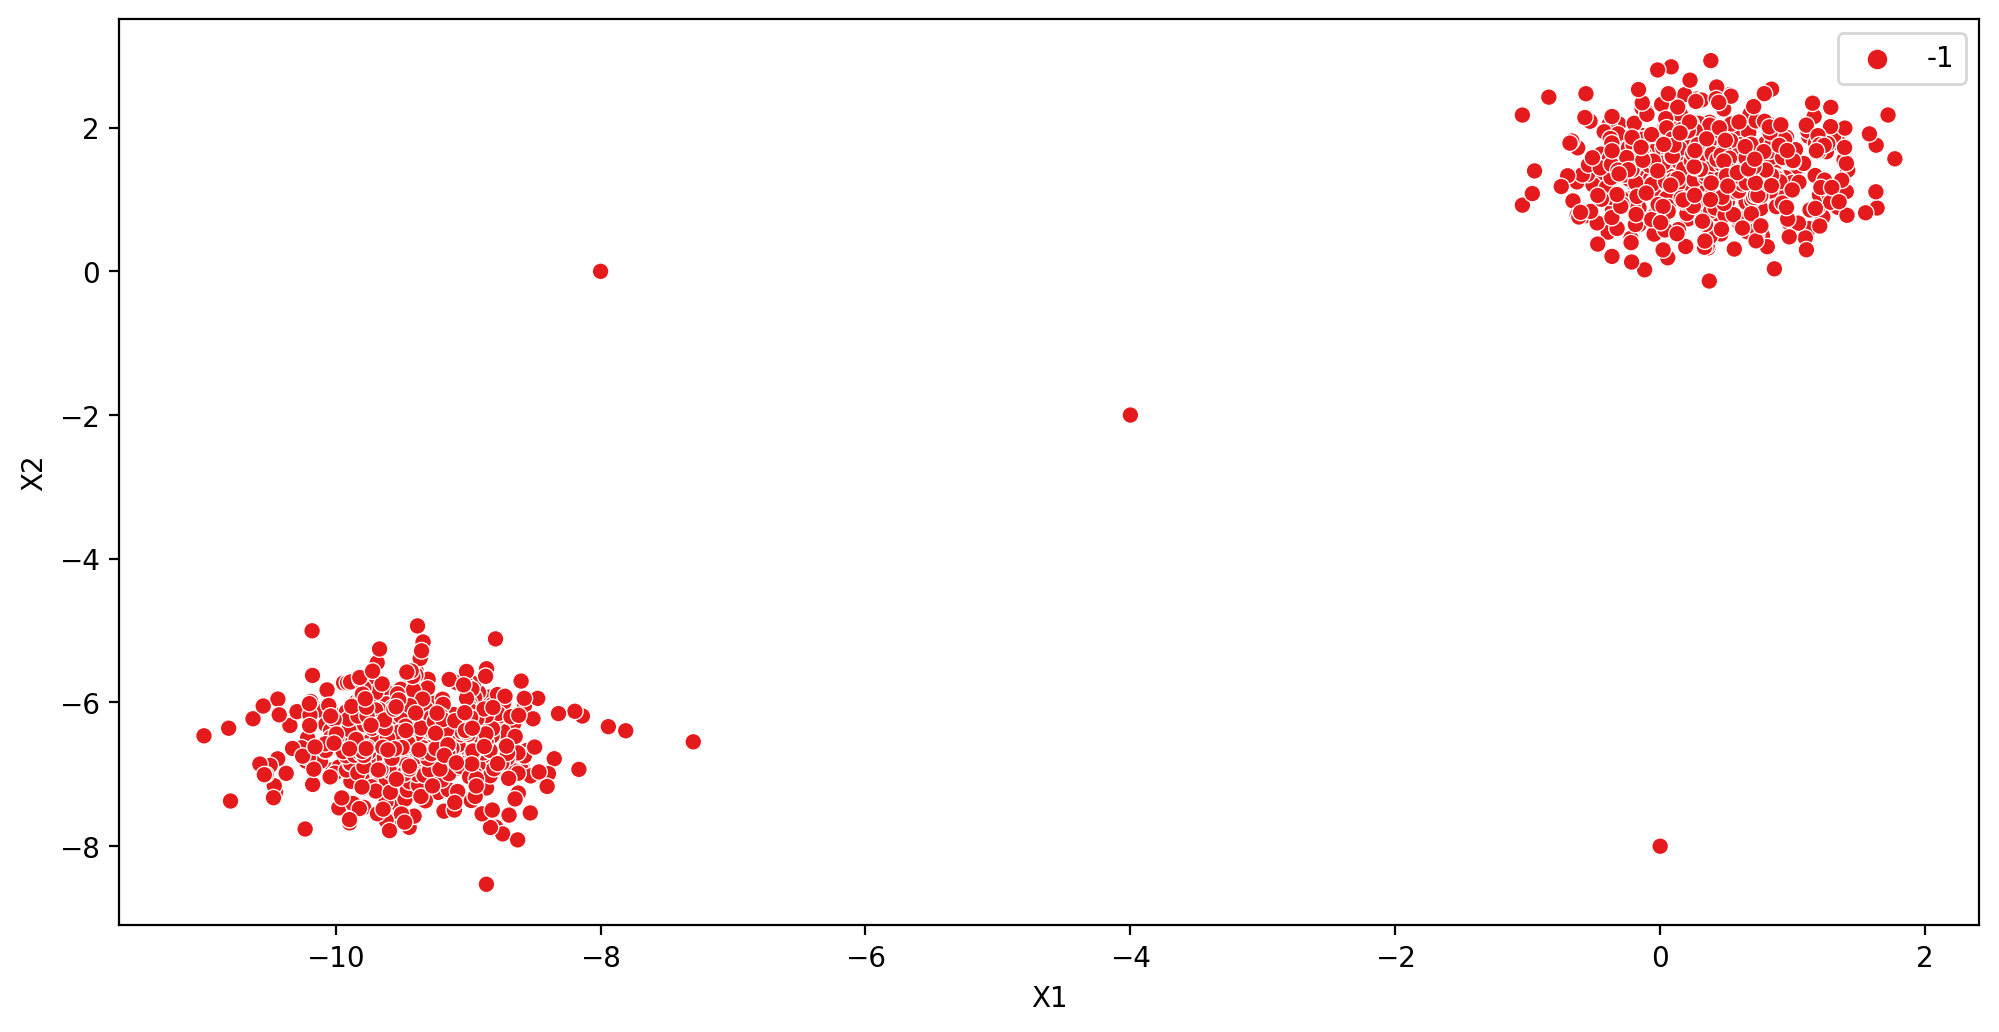

In [21]:
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan, two_blobs_outliers)

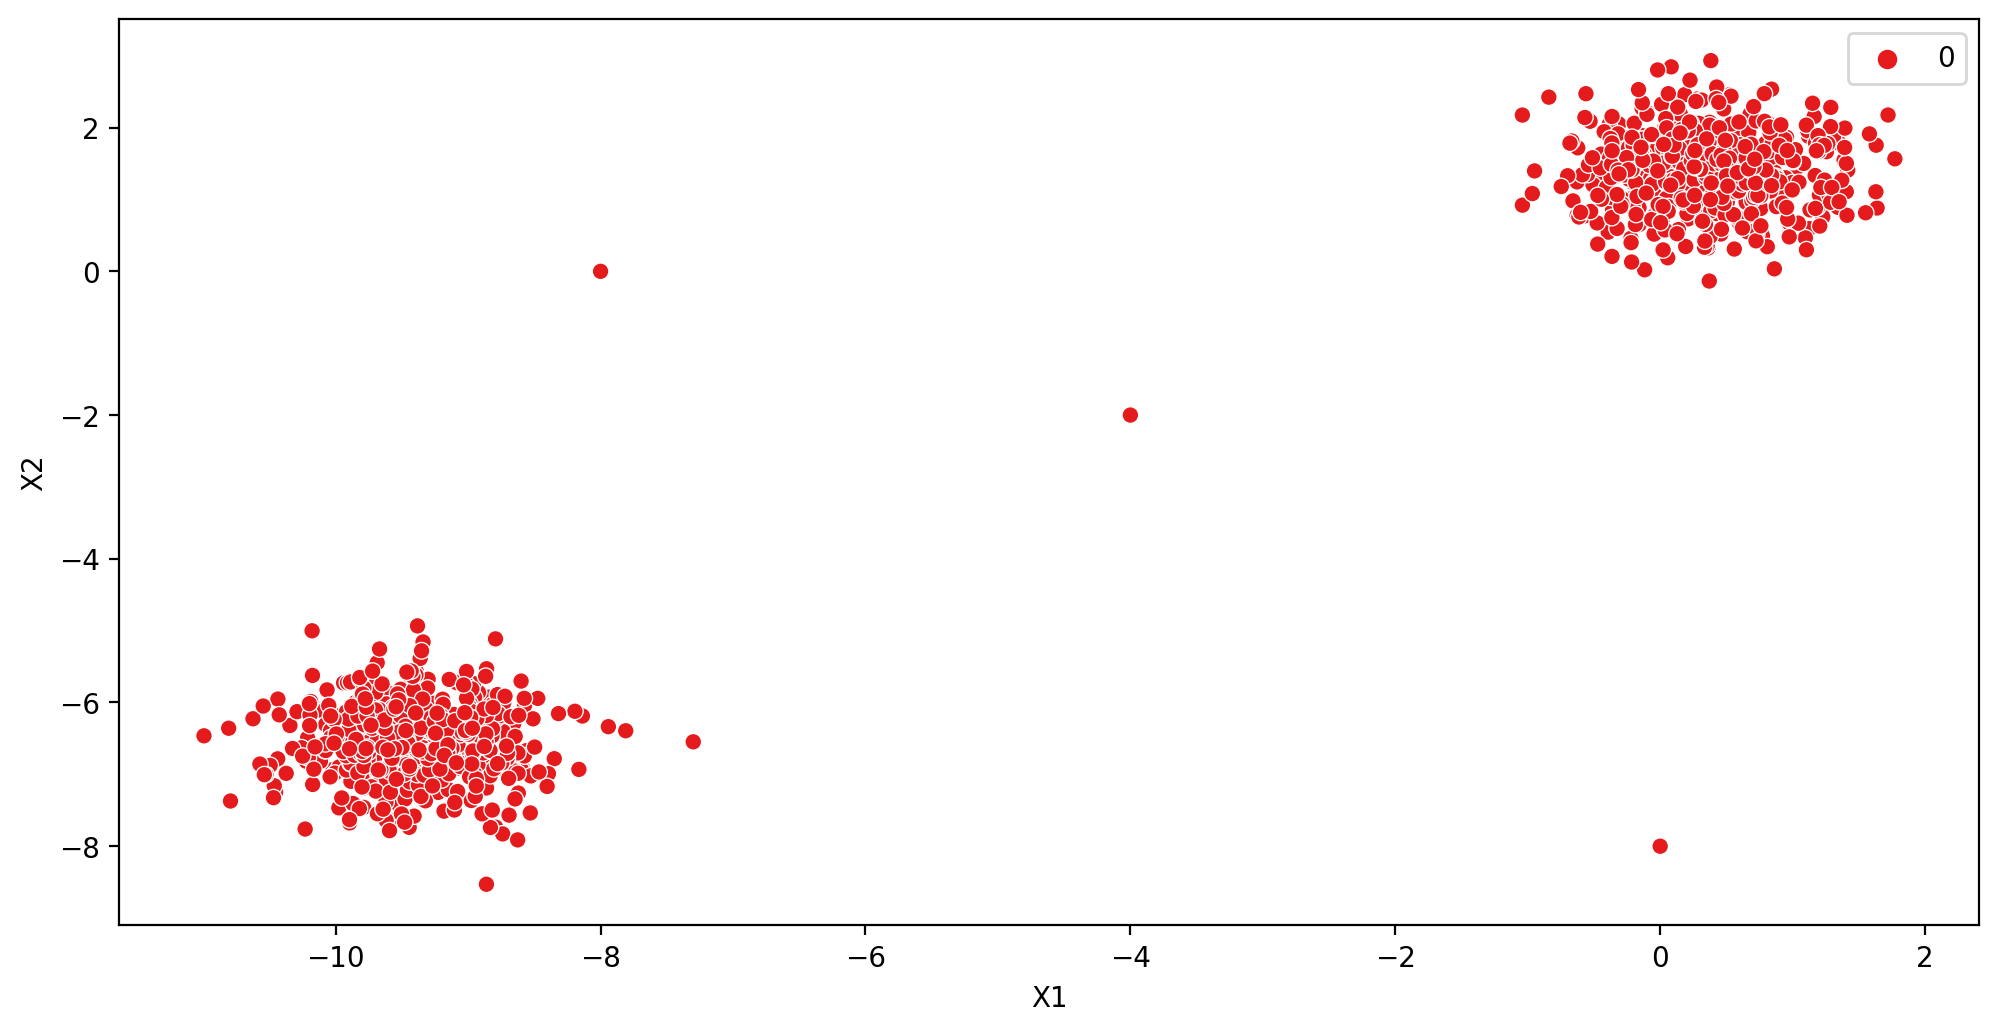

In [22]:
dbscan = DBSCAN(eps=10)
display_categories(dbscan, two_blobs_outliers)

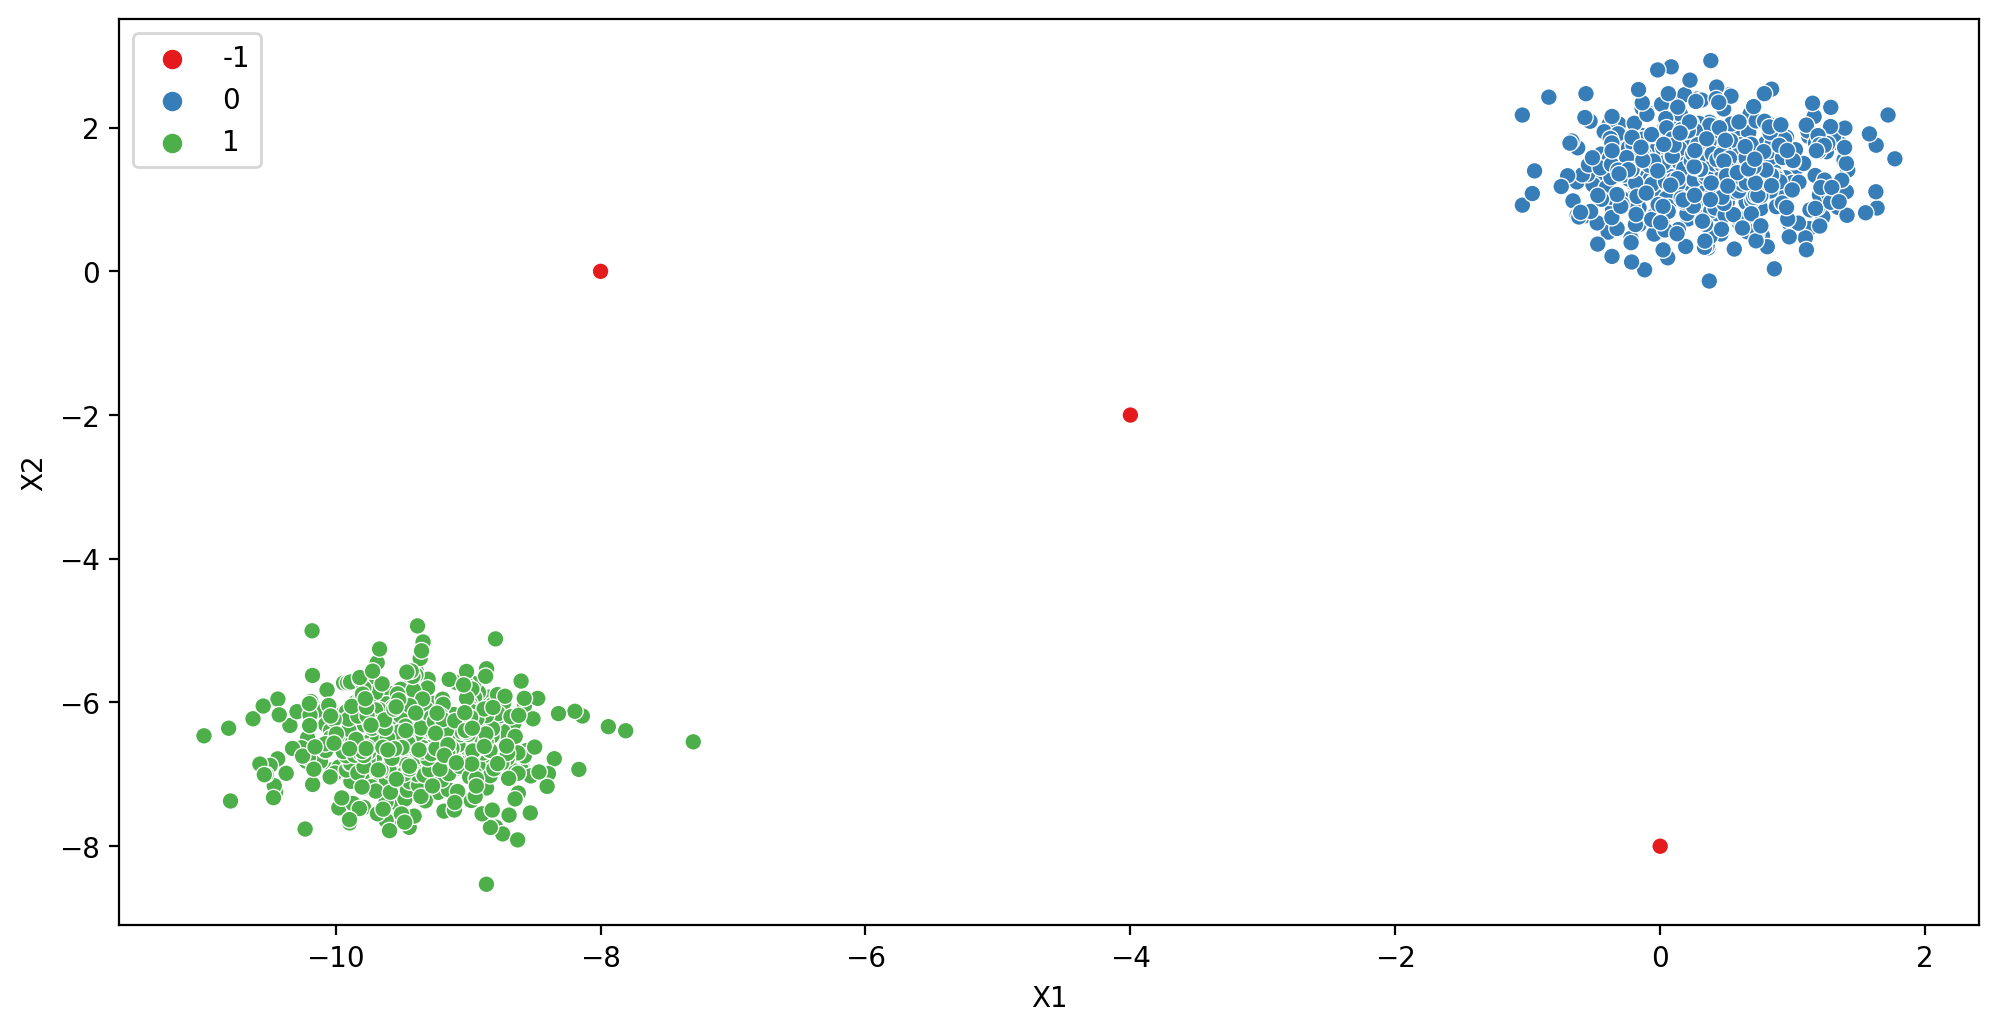

In [23]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan, two_blobs_outliers)

In [24]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1])

In [25]:
dbscan.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [27]:
# total outliers found
np.sum(dbscan.labels_ == -1)

3

In [28]:
# percent of total outliers found
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

In [29]:
len(dbscan.labels_)

1003

In [30]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 10, 100):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # total outliers found
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # percent of total outliers found
    percent_outlier = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(percent_outlier)

<AxesSubplot:>

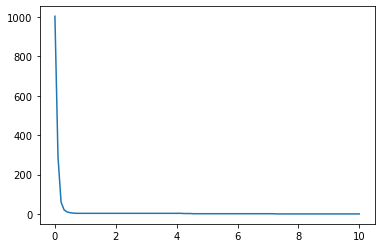

In [31]:
sns.lineplot(x=np.linspace(0.001, 10, 100), y=number_of_outliers)

In [32]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 7, 200):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # total outliers found
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # percent of total outliers found
    percent_outlier = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(percent_outlier)

(0.0, 2.0)

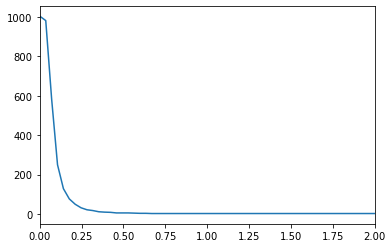

In [36]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=number_of_outliers)
plt.xlim(0, 2)

Text(0, 0.5, 'Percent of Points classified as Outliers')

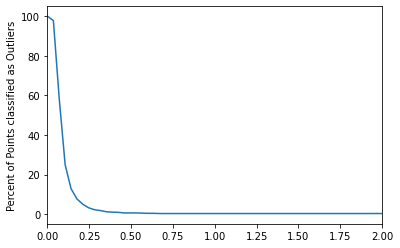

In [39]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=outlier_percent)
plt.xlim(0, 2)
plt.ylabel('Percent of Points classified as Outliers')

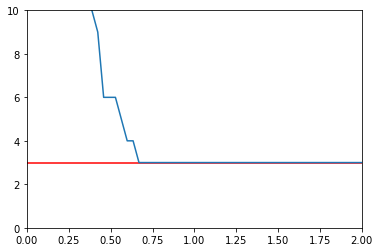

In [41]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=number_of_outliers)
plt.xlim(0, 2)
plt.ylim(0, 10)

plt.hlines(y=3, xmin=0, xmax=2, colors='red')

In [42]:
outlier_percent = []
number_of_outliers = []

for n in np.arange(1, 100):
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    # total outliers found
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # percent of total outliers found
    percent_outlier = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(percent_outlier)

Text(0, 0.5, 'Pct. of points classified as outlier')

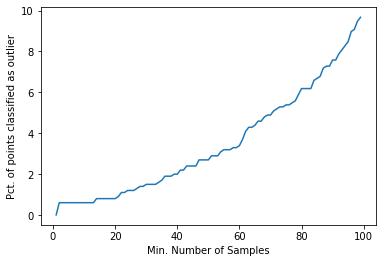

In [44]:
sns.lineplot(x=np.arange(1, 100), y=outlier_percent)
plt.xlabel('Min. Number of Samples')
plt.ylabel('Pct. of points classified as outlier')

In [47]:
num_dim = two_blobs_outliers.shape

In [48]:
num_dim

(1003, 2)

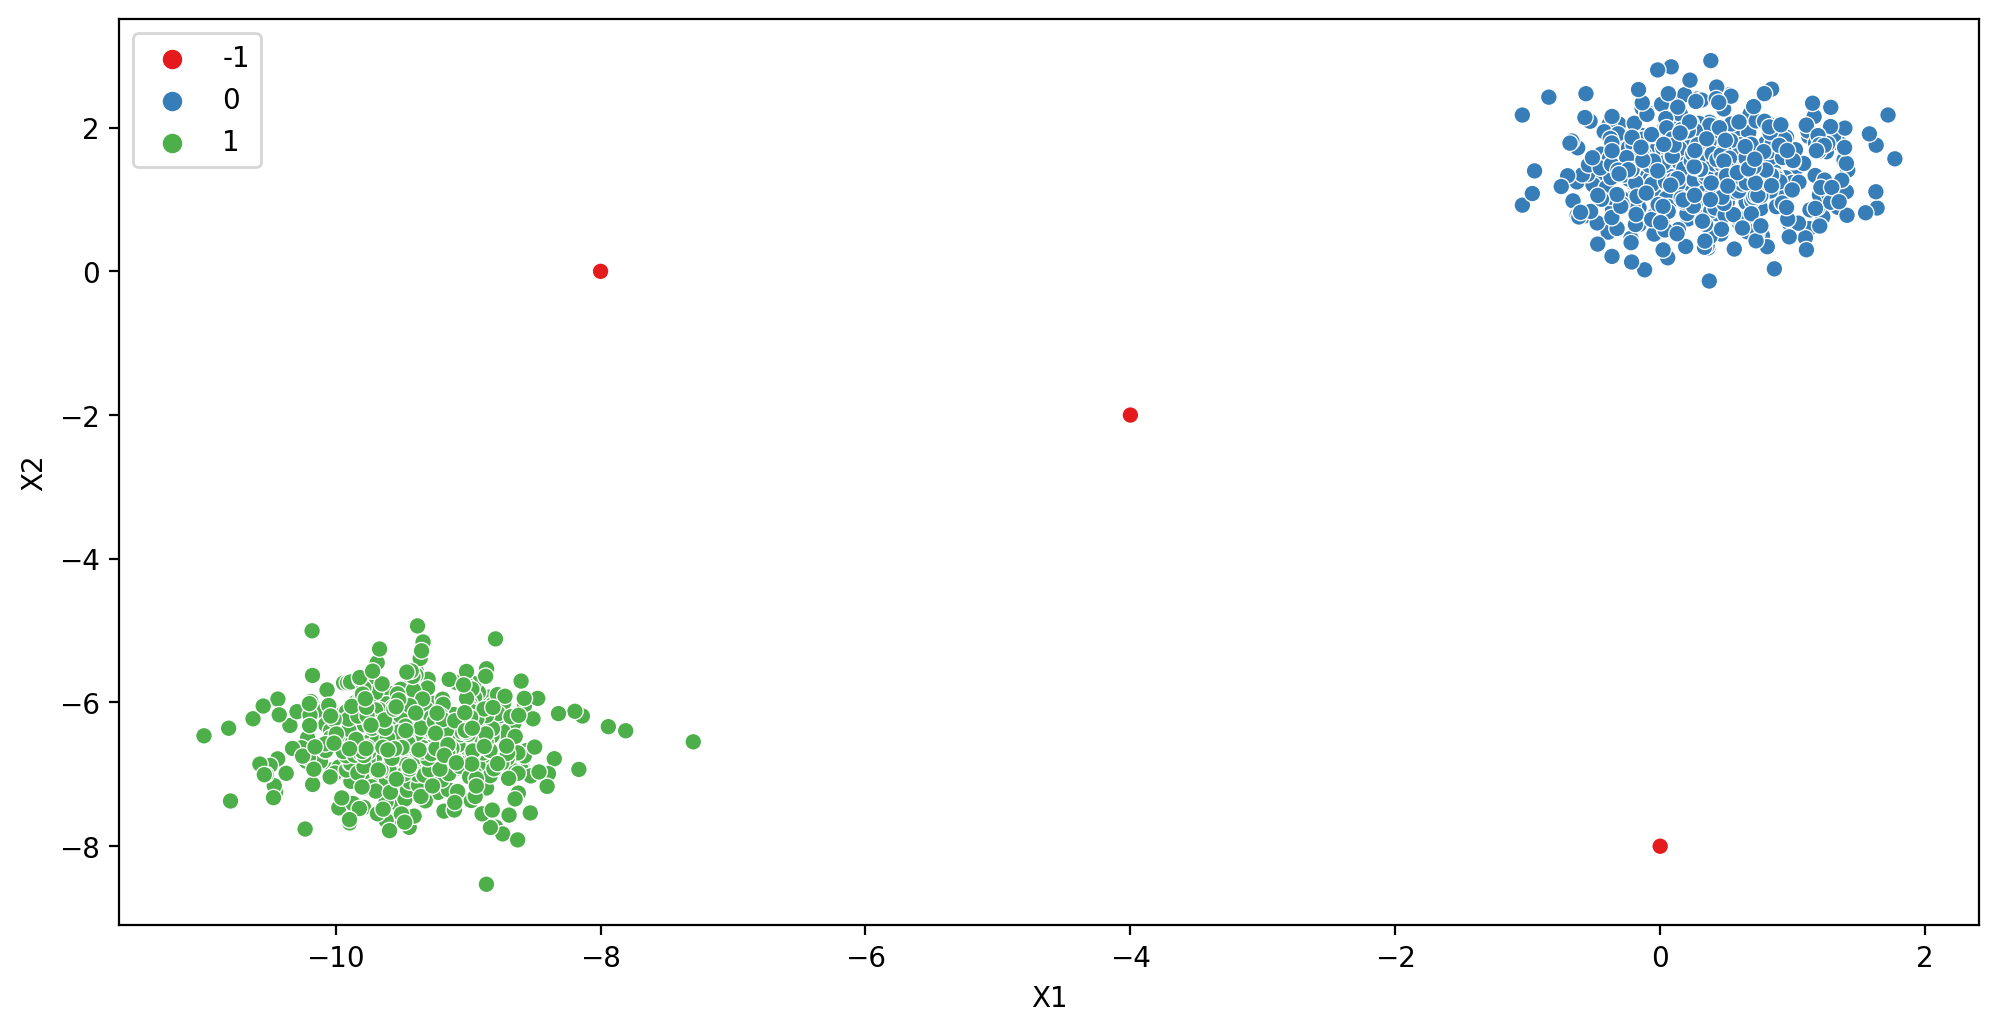

In [49]:
dbscan = DBSCAN(min_samples=2 * num_dim[1], eps=0.75)
display_categories(dbscan, two_blobs_outliers)